# 환경설정

In [3]:
# 필요한 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

pd.__version__

'2.2.3'

# 상관계수
- 피어슨 상관계수 (두 연속형 변수)
- 계수 ($$ 표시 latex(수식) 문법 적용)
  + $r$ = +/-1 : 완벽한 상관관계를 가짐,
  + $r$ = 0 : 두 변수 간에는 선형적 관계가 없음
- 가설설정
  + 귀무가설 : 상관계수가 0이다 (두 변수 간 상관관계가 없음)
  + 대립가설 : 상관계수는 0이 아니다 (두 변수 간 상관관계가 있음

In [2]:
import numpy as np
import scipy.stats as stats # 수치해석, 통계 관련 라이브러리

# 샘플 데이터
x = np.array([10, 20, 30, 40, 50])
y = np.array([5, 15, 30, 35, 40])

coeff, p_value = stats.pearsonr(x, y)
#      상관계수   p_value
print(coeff,      p_value)

0.9761870601839526 0.004395375691816597


# 회귀분석
- 통계적 접근 : 수많은 가정을 이해해야 함
  + statsmodels 라이브러리 메인 활용
- ML/DL 접근 : 수치 예측, 수치 예측이 가능한 모델이 상품화 할 수 있는가? (ML/DL)
  + scikit-learn 라이브러리 활용

- 머신러닝/딥러닝 ==> 내부 알고리즘, 수식과 통계이론으로 정철된 분야
- 머신러닝 학습하기 전에는 반드시 모든 데이터가 숫자로 구성이 되어 있어야 함

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

df_iris = load_iris()

# pandas dataFrame으로 변환
iris = pd.DataFrame(data = df_iris.data, columns = df_iris.feature_names)
iris.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

# 타겟 클래스명 추가
iris['species'] = df_iris.target

# species 라벨을 실제 이름으로 변경
# pandas 메서드, map() 활용
# (0: setosa, 1: versicolor, 2: virginica)
iris["species"] = iris["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 통계적 관점에서의 회귀모델
- statsmodels 라이브러리 활용
- 링크 : 추가
- 회귀모형
  + 모형이 유의한가?, 기울기 관점에서 이해
    - 1차함수, y = b0 + b1x1 + b2x2 + e
  + 모형을 사용할 수 있는가?
  + 가설설정
    - 귀무가설 : 기울기가 0인가?
    - 대립가설 : 기울기가 0이 아니다
- 회귀식 자체에 대해서 살펴보는 통계량 F통계량 (F 통계량은 실전에서는 딱히 중요하지 않음)
- 개별적인 필드(컬럼)에 관한 기울기 통계량 t통계량 (특정한 필드를 선정해야 해서, 이 통계량이 중요함)

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # 유쾌한 R 통계학, formula 형태로 모델 만듬

# 방법 1.
# 실제 프로젝트 할 때는 가장 어려운 것! y값을 정하는 것 ==> 프로젝트 주제
model = smf.ols('Petal_Length ~ Petal_Width + Sepal_Length', data = iris).fit()
print(model.summary())

# 분석가 희망자들 : 아래 결과를 모두 이해하는 방향으로 공부
# 데이터 엔지니어 : R-squared, 이것만 확인

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.01e-95
Time:                        09:49:03   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5071      0.337     -4.473   

In [18]:
# 벙법 2.                                                             # 다중선형회귀 모형
model2 = smf.glm("Petal_Length ~ Petal_Width + Sepal_Length", family = sm.families.Gaussian(), data = iris).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Petal_Length   No. Observations:                  150
Model:                            GLM   Df Residuals:                      147
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                         0.16260
Method:                          IRLS   Log-Likelihood:                -75.090
Date:                Fri, 16 May 2025   Deviance:                       23.902
Time:                        10:06:29   Pearson chi2:                     23.9
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5071      0.337     -4.473   

In [19]:
# 방법 3. 범주형 데이터가 들어갈 경우 C()로 작성해서 해당 필드가 범주형 변수 명시, 자체적으로 인코딩이 됨
model3 = smf.ols("Petal_Length ~ Petal_Width + Sepal_Length + C(species)", data = iris).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1600.
Date:                Fri, 16 May 2025   Prob (F-statistic):          8.06e-119
Time:                        10:09:18   Log-Likelihood:                -11.867
No. Observations:                 150   AIC:                             33.73
Df Residuals:                     145   BIC:                             48.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [23]:
# 방법 4. 행렬 활용
X = iris[['Petal_Width', 'Sepal_Length']]
y = iris['Petal_Length']

X = sm.add_constant(X)

model4 = sm.OLS(y, X).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.01e-95
Time:                        10:44:31   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5071      0.337     -4.473   

In [31]:
# 회귀계수에 따른 모델식
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.01e-95
Time:                        11:26:45   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5071      0.337     -4.473   

In [36]:
# 회귀식
# Petal_Length_result = -1.5071 + 1.7481xPetal_Width + 0.5423xSepal_Length
# 만약에 필드가 10개 있는데, 그 중에서 p > 0.05이상인 필드가 3개 있음
# 그럼 어떻게 해야할까?
# 가장 좋은 모델을 선정하는 방법 (항상 AIC, BIC 같이 지표를 봐야함)
# 잘못 알려진 사실 : A, B, C 컬럼을 한꺼번에 제거하고 나머지 7개를 활용하여 다시 모델을 만드는 방법
# 제대로 하려면, A, B, C 중에서 t통계량이 가장 낮은 것을 제거하고, B, C 포함해서 9개 필드를 활용해서 모델을 다시 만들기
# 그리고나서 기존모델과 새로운 모델 비교 (AIC, BIC, Adj. R-squared 같이 활용해서 종합적으로 판단
# 최적의 조합을 찾는 것이 핵심 (현실 가능해야 하고, 현실 적용이 되어야 함)
# 예시) 부동산 가격 예측 모델
# 평수가 높으면 높을수록 가격이 올라간다는 명제, p-value 값이 매우 높게 나와도 현실적으로 활용
# 회귀계수 추출
model.params[1:]

# 회귀계수가 가장 큰 변수 출력 (idxmax())
model.params[1:].idxmax()

'Petal_Width'

In [38]:
t_values = model.tvalues
print(t_values)

p_values = model.pvalues
print(p_values)

Intercept       -4.472752
Petal_Width     23.205443
Sepal_Length     7.819907
dtype: float64
Intercept       1.535178e-05
Petal_Width     5.257543e-51
Sepal_Length    9.414477e-13
dtype: float64


In [26]:
conf_intervals = model.conf_int() # 신뢰구간 추출
conf_intervals

,0,1
const,-2.173050,-0.841227
Petal_Width,1.599230,1.896976
Sepal_Length,0.405218,0.679294


In [27]:
conf_intervals = model.conf_int(alpha = 0.10) # 신뢰구간 추출
conf_intervals

,0,1
const,-2.064903,-0.949373
Petal_Width,1.623408,1.872798
Sepal_Length,0.427473,0.657038


### 모델 평가 지표
- 결정계수 (SST = SSR + SSE)
  + 회귀제곱합(SSR)만 집중적으로 공부해서 이해가 되면 OK
- F통계량

In [40]:
# 결정계수     수정된 결정계수
model.rsquared, model.rsquared_adj

(np.float64(0.9485236349446816), np.float64(0.947823276236446))

### 모델 비교

In [39]:
model0 = smf.ols("Petal_Length ~ Petal_Width", data = iris).fit()
model = smf.ols("Petal_Length ~ Petal_Width + Sepal_Length", data = iris).fit()
model3 = smf.ols("Petal_Length ~ Petal_Width + Sepal_Length + C(species)", data = iris).fit()

# 두 모델을 비교할 때, 어느 것이 좋은 모델이냐?

model0.aic, model.aic, model3.aic, model0.aic, model.bic, model.bic

(np.float64(206.35386357991936),
 np.float64(156.17922963502622),
 np.float64(33.733547285926875),
 np.float64(206.35386357991936),
 np.float64(165.21113551731497),
 np.float64(165.21113551731497))

### 범주형 데이터가 있을 때 해석 방법
- 계수 해석 방법
- 모든 값들이 출력이 안됨. setosa가 제외 됨
- https://dschloe.github.io/python/2024/01/statsmodels_category_variable_regression/

 <!-- P>|t| (p-value)값이 크면 기존과 크게 다른 점이 없다? -->

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Petal_Length   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.01e-95
Time:                        11:28:44   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5071      0.337     -4.473   

### 위 모형을 사용할 수 있는가?
- 독립성 가정 체크 (더빈-왓슨 통계량)
  + d = 2 : 잔차 간의 자기 상관이 존재하지 않음
  + d < 2 or d > 2 : 잔차 간의 자기 상관이 존재
- 잔차의 정규성 체크
  + 샤피로 월크스 검정, 앤더슨-달링 테스트(자주 사용 X)
- 잔차의 등분산성 체크
  + Breusch-Pagen 검정
- 다중공선성 체크 (VIF)
  + 수치 데이터가 100개가 존재함, 상관관계 매트릭스, 0.95. 0.99
  + 매출 예측 모델
    + VIF가 10이상이면 다른 독립변수들간의 선형적인 관계가 높음 ==> 해당 필드 제거 후, 모델 다시 만들기
    + 독립변수 : 광고비, 클릭률, 전환율, 광고노출율
    + 종속변수 : 매출

In [41]:
# 더빈 왓슨 
dw_stat = model.summary( ).tables[2].data[0][3]
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic:    1.339


In [42]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(dw_stat)

1.339118544138463


In [43]:
# 잔차 계산
from scipy.stats import anderson
residuals = model.resid

# 엔더슨-달링 테스트
ad_stat, ad_critical_values, ad_significance_level = anderson(residuals, dist = 'norm')
print(f'Anderson-Darling Test Statistic: {ad_stat}')
print(f'Critical Values: {ad_critical_values}') # (15%, 10%, 5%, 2.5%, 1%)에 대한 임곗값
print(f'Significance Levels: {ad_significance_level}')

Anderson-Darling Test Statistic: 0.2799444785279661
Critical Values: [0.562 0.64  0.767 0.895 1.065]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [44]:
from scipy.stats import shapiro

# 샤피로-윌크 테스트
sw_stat, sw_p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {sw_stat}')
print(f'p-value: {sw_p_value}')

Shapiro-Wilk Test Statistic: 0.9932794545480742
p-value: 0.7114249301708787


In [45]:
# 등분산성 검정
from statsmodels.stats.diagnostic import het_breuschpagan
bptest = het_breuschpagan(model.resid, model.model.exog)

print('BP-test statistics:', bptest[0])
print('p-value:', bptest[1])

BP-test statistics: 6.209462862284509
p-value: 0.044836558645739086


### VIF 계산

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = iris[['Petal_Width', 'Sepal_Length']]

# VIF 계산
vif_data = pd.DataFrame( )
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

       Variable       VIF
0   Petal_Width  5.150649
1  Sepal_Length  5.150649


### 예측 및 추정

In [47]:
from sklearn.metrics import mean_squared_error

# 새로운 데이터 생성 (행 5개)
new_data = pd.DataFrame({
'Petal_Width': [0.2, 1.5, 1.3, 2.1, 1.8],
'Sepal_Length': [4.9, 5.5, 6.1, 6.7, 7.2],
'species': ['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica']})

# 예측값 계산
y_pred = model.predict(new_data)

# 실제값과 비교할 y_true 생성 (예제 값 사용)
y_true = np.array([1.4, 4.7, 5.1, 5.8, 6.3])

# MSE 계산
mse_score = mean_squared_error(y_true, y_pred)

# 결과 출력
print("예측값:\n", y_pred)
print(f"MSE: {mse_score:.4f}")

예측값:
 0    1.499535
1    4.097422
2    4.073155
3    5.796990
4    5.543687
dtype: float64
MSE: 0.3999


# 로지스틱회귀분석

## ODDS RATIO (오즈비)
$$  
\text{Odds Ratio} = \frac{a/c}{b/d} = \frac{ad}{bc}
$$
- OR = 1 : 두 그룹의 승산이 같다.
- OR > 1 : 그룹 A가 앞면이 더 잘 나올 확률이 높다.
- OR < 1 : 그룹 B가 앞면이 더 잘 나올 확률이 높다. 

In [52]:
# 데이터 정의
a = 30  # 그룹 A: 앞면
b = 10  # 그룹 A: 뒷면
c = 20  # 그룹 B: 앞면
d = 20  # 그룹 B: 뒷면

# 승산비 계산
odds_ratio = (a * d) / (b * c)

print(f"Odds Ratio = ({a} × {d}) / ({b} × {c}) = {odds_ratio:.2f}")

Odds Ratio = (30 × 20) / (10 × 20) = 3.00


- 해석 그룹 A는 그룹 B보다 앞면이 나올 "승산"이 3배 높다는 것을 코드로도 확인할 수 있다.

## 시나리오
- A 팀 : 16회 진출, 12번 16강 진출 ==> 진출 탈락, 3:1
- B 팀 : 16회 진출, 4번 16강 진출 ==> 진출 탈락, 1:3
- 오즈비
  + Odds_A = 3
  + Odds_B = 1/3
  + 9배 높음

In [63]:
# 국가 A와 B의 진출/탈락 횟수
a = 12  # A팀 16강 진출
b = 4   # A팀 탈락
c = 4   # B팀 16강 진출
d = 12  # B팀 탈락

# 승산비 계산
odds_ratio = (a * d) / (b * c)
print(f"Odds Ratio = ({a}×{d}) / ({b}×{c}) = {odds_ratio:.2f}")

Odds Ratio = (12×12) / (4×4) = 9.00


### 승산비
- 로지스틱 회귀에서 독립 변수의 계수가 $𝛽$
  + 그 변수의 단위 증가가 종속 변수의 승산비를 $e^{𝛽}$배 변화시킨다.
  + e : 자연상수, 2.718
$$
\text{Odds Ratio} = e^{\beta}
$$



- $\beta = \log(2) \Rightarrow e^{\beta} = 2$
- $e^{\beta} = 2$ => 해당 변수 증가 시 승산이 2배 증가

In [50]:
beta = 0.6931
print(np.exp(beta))  # 약 2.0

1.9999056411060796


## 로지스틱 회귀 기본 개념

In [53]:
import pandas as pd
import numpy as np
admission_data = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/admission.csv')
print(admission_data.shape)
print(admission_data.head( ))

(400, 5)
   admit  gre   gpa  rank gender
0      0  380  3.61     3      M
1      1  660  3.67     3      F
2      1  800  4.00     1      F
3      1  640  3.19     4      M
4      0  520  2.93     4      M


- 합격비율
- 성공할 확률 P, 실패할 확률 1-p
- P / (1-p)

In [54]:
p_hat = admission_data['admit'].mean()
p_hat, (1-p_hat)

(np.float64(0.3175), np.float64(0.6825))

In [55]:
# 합격률은 입학에 실패할 확률의 약 46.5%정도 이다
rint("Odds Ratio:", p_hat / (1-p_hat))

Odds Ratio: 0.4652014652014652


## 범주형 변수를 사용한 오즈 계산
- rank 변수

In [58]:
# Rank
sorted(admission_data['rank'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

- OR = 1 : 두 그룹의 승산이 같다
- OR > 1 : 합격할 확률이 불합격할 확률보다 18% 높음
- OR < 1 : 합격할 확률보다 불합격할 확률이 더 높음

In [61]:
# 각 등급별 입학에 대한 오즈를 구해보기
grouped_df= admission_data.groupby('rank').agg(p_admit = ('admit', 'mean'))
grouped_df['odds'] = grouped_df['p_admit'] / (1 - grouped_df['p_admit'])
grouped_df

,p_admit,odds
rank,,
1,0.540984,1.178571
2,0.357616,0.556701
3,0.231405,0.301075
4,0.179104,0.218182


In [62]:
1.178 / (1.178 + 1)

0.5408631772268135

C:\Users\Admin\AppData\Local\Temp\ipykernel_14812\1683255327.py:5: RuntimeWarning: divide by zero encountered in divide
  log_odds = np.log(p / (1 - p))
C:\Users\Admin\AppData\Local\Temp\ipykernel_14812\1683255327.py:5: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(p / (1 - p))


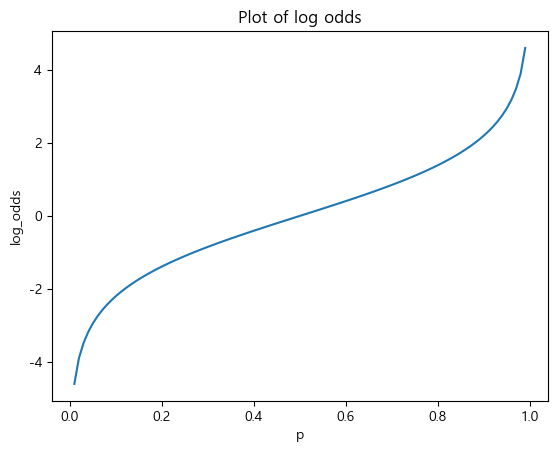

In [75]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0, 1.01, 0.01)
log_odds = np.log(p / (1 - p))

plt.plot(p, log_odds)
plt.xlabel('p')
plt.ylabel('log_odds')
plt.title('Plot of log odds')
plt.show( )

In [65]:
grouped_df= admission_data.groupby('rank').agg(p_admit = ('admit', 'mean'))
grouped_df['odds'] = grouped_df['p_admit'] / (1 - grouped_df['p_admit'])
grouped_df['log_odds'] = np.log(grouped_df['odds'])
grouped_df

,p_admit,odds,log_odds
rank,,,
1,0.540984,1.178571,0.164303
2,0.357616,0.556701,-0.585727
3,0.231405,0.301075,-1.200395
4,0.179104,0.218182,-1.522427


In [66]:
df =grouped_df.reset_index()
df

,rank,p_admit,odds,log_odds
0,1,0.540984,1.178571,0.164303
1,2,0.357616,0.556701,-0.585727
2,3,0.231405,0.301075,-1.200395
3,4,0.179104,0.218182,-1.522427


In [76]:
import statsmodels.formula.api as smf
# 회귀식으로 처리가 됨
model = smf.ols('log_odds ~ rank', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_odds   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     68.47
Date:                Fri, 16 May 2025   Prob (F-statistic):             0.0143
Time:                        15:42:02   Log-Likelihood:                 3.2107
No. Observations:                   4   AIC:                            -2.421
Df Residuals:                       2   BIC:                            -3.649
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6327      0.188      3.368      0.0

C:\Users\Admin\Desktop\ai_statistics\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## 모델 만들기
- rank, int64 ==> 숫자
  + rank는 범주로 취급
- gender, object (문자열, X) ==> 아직 정의되지 않은 객체
  + gender, 범주로 취급

In [68]:
# admission_data.head()
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
 4   gender  400 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [72]:
admission_data['rank'] = admission_data['rank'].astype('category') # 범주형으로 취급
admission_data['gender'] = admission_data['gender'].astype('category') # 범주형으로 취급

admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   admit   400 non-null    int64   
 1   gre     400 non-null    int64   
 2   gpa     400 non-null    float64 
 3   rank    400 non-null    category
 4   gender  400 non-null    category
dtypes: category(2), float64(1), int64(2)
memory usage: 10.6 KB


### 가설설정
- 기울기가 있냐 없냐?
  + 전체식이 유의하냐?
  + 각 개별적인 필드(컬럼), 변수의 기울기가 유의하냐?
- 해석
  + gender[T.M] : 남학생의 합격율과 여학생의 합격률의 차이는 없다 (= 즉 성별은 입학여부에 관련이 없다)

In [82]:
model = smf.logit("admit ~ gre + gpa + rank + gender", data = admission_data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573066
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.08305
Time:                        16:21:54   Log-Likelihood:                -229.23
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 2.283e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.9536      1.149     -3.442      0.001      -6.205      -1.702
rank[T.2]      -0.6723    

In [73]:
# 승산비를 구해야 함
import numpy as np
np.exp(0.8032) # 2.23배 증가 gpa가 1점 증가할 때마다 입학 합격률이 2.23배 증가

np.float64(2.232674066397348)

In [77]:
np.exp(0.0023) # 1.002배 증가, gre가 1점 증가할 때마다 입학 합격률이 1.002배 증가

np.float64(1.0032051254657053)

## 모델의 통계량 구하기

In [83]:
print(model.llf), print(model.llnull)

-229.2265043299036
-249.98825881093052


(None, None)

In [87]:
test_statistic = -2 * (model.llnull - model.llf)
test_statistic, # 검정통계량 ==> 카이제곱분포 따라감,

from scipy.stats import chi2

# 자유도 계산
df = model.df_model - 0 # 기저모델은 자유도가 0

p_value = np.round(chi2.sf(test_statistic, df), 10)
p_value

np.float64(2.283e-07)

# Tips 데이터 활용한 복습

In [88]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.info()

# size ==> category로 변경 후 코드 작성

# tip에 영향을 주는 주요 요인 찾기
## AIC, BIC를 활용해서 모델을 비교하면서 최적의 모델 찾기
## 모형 해석
## 독립성 검정, 잔차의 정규성 검정, 등분산성 검정, 다중공선성(X)

# smoker 흡연여부, 흡연여부에 영향을 주는 주요 요인 찾기
## AIC, BIC를 활용해서 모델을 비교하면서 최적의 모델 찾기
## 모형 해석
## 각 값에 대해 승산비 구하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
